## Simple example of TuRBO-1

In [1]:
cd ..

/home/mattyshen/NNTuRBO


In [2]:
from nnturbo import NNTurbo1
import numpy as np
import torch
import math
import matplotlib
import matplotlib.pyplot as plt

## Set up an optimization problem class

In [3]:
class Levy:
    def __init__(self, dim=10):
        self.dim = dim
        self.lb = -5 * np.ones(dim)
        self.ub = 10 * np.ones(dim)
        
    def __call__(self, x):
        assert len(x) == self.dim
        assert x.ndim == 1
        assert np.all(x <= self.ub) and np.all(x >= self.lb)
        w = 1 + (x - 1.0) / 4.0
        val = np.sin(np.pi * w[0]) ** 2 + \
            np.sum((w[1:self.dim - 1] - 1) ** 2 * (1 + 10 * np.sin(np.pi * w[1:self.dim - 1] + 1) ** 2)) + \
            (w[self.dim - 1] - 1) ** 2 * (1 + np.sin(2 * np.pi * w[self.dim - 1])**2)
        return val

f = Levy(10)

## Create a Turbo optimizer instance

In [4]:
turbo1 = NNTurbo1(
    f=f,  # Handle to objective function
    lb=f.lb,  # Numpy array specifying lower bounds
    ub=f.ub,  # Numpy array specifying upper bounds
    n_init=20,  # Number of initial bounds from an Latin hypercube design
    max_evals = 1000,  # Maximum number of evaluations
    batch_size=10,  # How large batch size TuRBO uses
    verbose=True,  # Print information from each batch
    use_ard=True,  # Set to true if you want to use ARD for the GP kernel
    max_cholesky_size=2000,  # When we switch from Cholesky to Lanczos
    n_training_steps=50,  # Number of steps of ADAM to learn the hypers
    min_cuda=1024,  # Run on the CPU for small datasets
    device="cuda",  # "cpu" or "cuda"
    dtype="float64",  # float64 or float32
    prop=1.25,
    p=2
)

Using dtype = torch.float64 
Using device = cuda:0


# Run the optimization process

In [5]:
turbo1.optimize()

Starting from fbest = 21.8
30) New best: 15.57
50) New best: 14.56
60) New best: 9.805
70) New best: 9.062
80) New best: 4.17
120) New best: 2.528
140) New best: 1.354
180) New best: 0.7247
210) New best: 0.6177
220) Restarting with fbest = 0.6177
Starting from fbest = 26.32
490) New best: 0.4478
500) Restarting with fbest = 0.4478
Starting from fbest = 35.88
700) Restarting with fbest = 4.412
Starting from fbest = 12.33
970) Restarting with fbest = 1.07
Starting from fbest = 17.61


## Extract all evaluations from Turbo and print the best

In [6]:
X = turbo1.X  # Evaluated points
fX = turbo1.fX  # Observed values
ind_best = np.argmin(fX)
f_best, x_best = fX[ind_best], X[ind_best, :]

print("Best value found:\n\tf(x) = %.3f\nObserved at:\n\tx = %s" % (f_best, np.around(x_best, 3)))

Best value found:
	f(x) = 0.448
Observed at:
	x = [0.923 0.521 0.479 0.986 1.244 0.737 0.99  0.347 0.016 1.785]


In [7]:
X.shape, fX.shape

((1000, 10), (1000, 1))

## Plot the progress
Each trust region is independent and finds different solutions

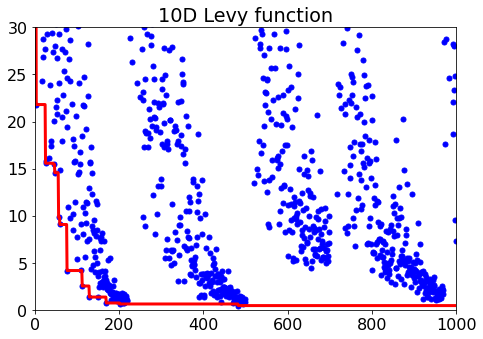

In [10]:
fig = plt.figure(figsize=(7, 5))
matplotlib.rcParams.update({'font.size': 16})
plt.plot(fX, 'b.', ms=10)  # Plot all evaluated points as blue dots
plt.plot(np.minimum.accumulate(fX), 'r', lw=3)  # Plot cumulative minimum as a red line
plt.xlim([0, len(fX)])
plt.ylim([0, 30])
plt.title("10D Levy function")

plt.tight_layout()
plt.show()

In [17]:
[np.random.choice(10, size=6, replace=False, p = np.arange(10)/np.sum(np.arange(10))) for i in range(5)]

[array([7, 8, 9, 3, 5, 2]),
 array([9, 5, 1, 2, 8, 3]),
 array([8, 9, 3, 5, 6, 7]),
 array([4, 3, 8, 6, 2, 9]),
 array([7, 8, 6, 9, 3, 5])]

In [19]:
import numpy as np

# Original array
original_array = np.array([0, 0, 0, 0, 0])

# Subset of indices where you want to add 1
subset_indices = np.array([1, 3])

# Add 1 to the specified indices
original_array[subset_indices] += 1

print(original_array)


[0 1 0 1 0]
